In [4]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
nltk.download('wordnet')
  
from nltk.corpus import stopwords                   #Stopwords corpus

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\second\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\second\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import des données

In [5]:
filename = "./sentiment_labelled_sentences/imdb_labelled.txt"

df = pd.read_csv(filename, sep="\t")
df.columns = ["sentence", "label"]

print("shape", df.shape)

shape (747, 2)


In [6]:
df.head()


sentence  label
0  Not sure who was more lost - the flat characte...      0
1  Attempting artiness with black & white and cle...      0
2       Very little music or anything to speak of.        0
3  The best scene in the movie was when Gerardo i...      1
4  The rest of the movie lacks art, charm, meanin...      0

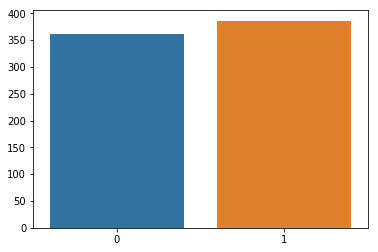

In [7]:
sns.barplot(np.unique(df['label']),df.groupby('label').count().values[:,0])

## Bag of words 

### Sur un sous-jeu de données

In [8]:
X_sub = df['sentence'][0:10]


On crée un dictionnaire, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique)

In [9]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['about', 'acting', 'adorable', 'almost', 'and', 'angles', 'anything', 'art', 'artiness', 'as', 'attempting', 'audience', 'baby', 'became', 'because', 'best', 'bit', 'black', 'buffet', 'camera', 'casting', 'characters', 'charm', 'clever', 'disappointed', 'effort', 'emptiness', 'empty', 'even', 'existent', 'find', 'flat', 'for', 'gerardo', 'good', 'guess', 'half', 'head', 'his', 'hours', 'if', 'in', 'is', 'it', 'jimmy', 'keeps', 'kids', 'lacks', 'lines', 'little', 'lost', 'loved', 'meaning', 'messages', 'more', 'movie', 'music', 'nearly', 'non', 'not', 'of', 'or', 'out', 'owls', 'plot', 'poor', 'predictable', 'rest', 'ridiculous', 'running', 'saw', 'scene', 'science', 'song', 'speak', 'sure', 'teacher', 'that', 'the', 'those', 'thought', 'through', 'to', 'today', 'trying', 'two', 'very', 'walked', 'was', 'wasted', 'were', 'when', 'white', 'who', 'whom', 'with', 'works']


In [10]:
print(count_vect.vocabulary_.get(u'who'))

93


In [11]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))

(10, 97)
  (0, 62)	1
  (0, 87)	1
  (0, 94)	1
  (0, 60)	1
  (0, 36)	1
  (0, 57)	1
  (0, 11)	1
  (0, 61)	1
  (0, 21)	1
  (0, 31)	1
  (0, 78)	2
  (0, 50)	1
  (0, 54)	1
  (0, 88)	1
  (0, 93)	1
  (0, 75)	1
  (0, 59)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [12]:
print(X_sub_counts.toarray()[0,:])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


In [13]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [14]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]

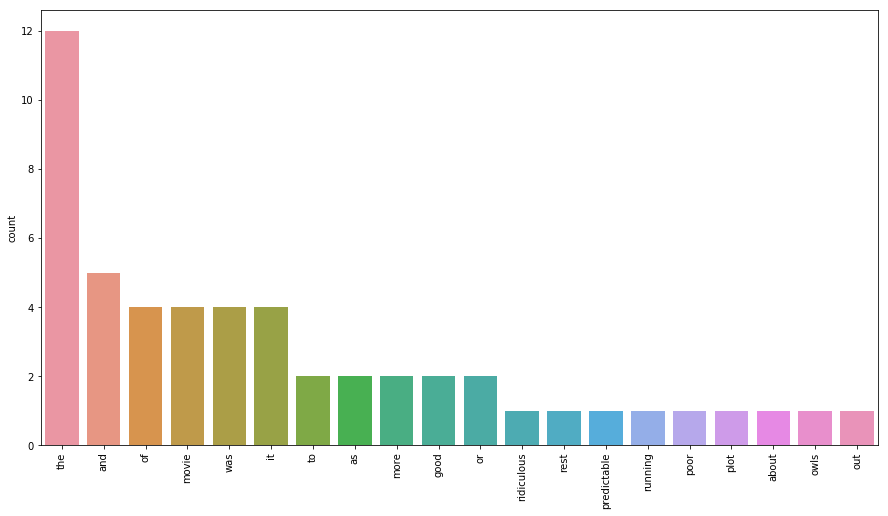

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

On définit une fonction qui prend en encapsule ce qui précède

In [16]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [17]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  97


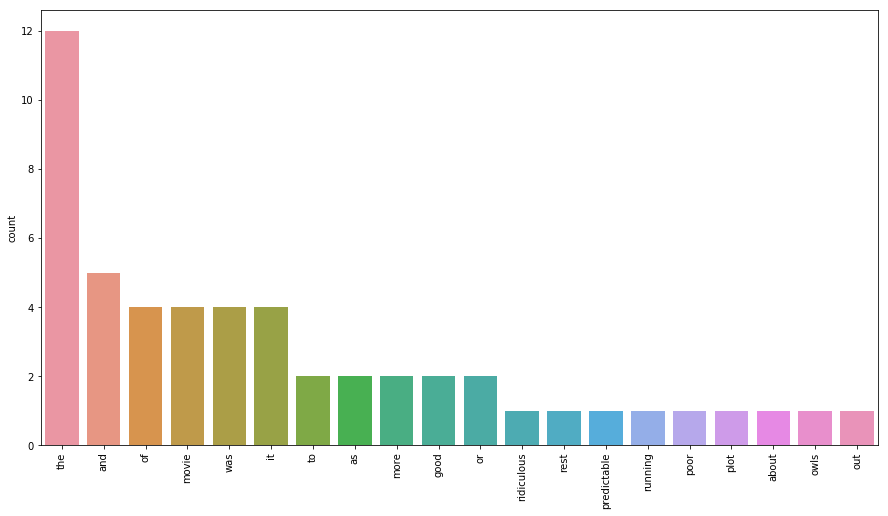

In [18]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)


### Passage aux données complètes

In [19]:
X = df['sentence']


Taille du dictionnaire :  3044


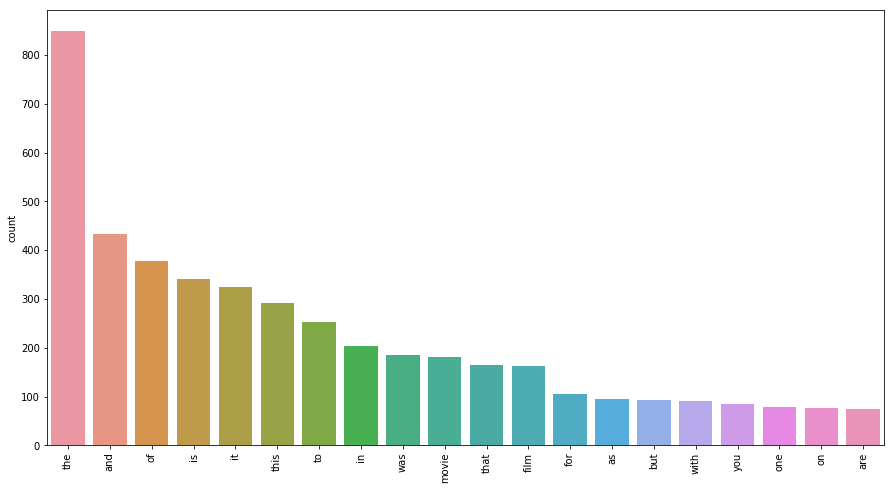

In [20]:
most_frequent_words_tot = most_frequent_words(count_vect,X)

Quels problèmes voyez-vous ?

## Préparation des données

### Miniscules UTF-8 sans ponctuation

Toujours vérifier que les mots sont en minuscule, qu'il n'a pas de signe de ponctuation, etc

### Stopwords

In [21]:
stop = set(stopwords.words('english')) 
print(stop)

{'an', "wasn't", 'i', 'having', 'him', 'no', "won't", 'by', 'his', 'nor', 'with', 'both', 'o', "haven't", 'them', 'out', 'our', 'your', 'on', 'when', 'how', 'few', 'too', 'now', "mightn't", 'what', 'at', 'being', 'm', 'until', 'they', 'mightn', 'while', 'been', 'mustn', 'further', 'did', "shan't", 'is', "isn't", 'himself', "hasn't", 'theirs', 'you', 'y', 'aren', 'then', 'her', 'into', "you've", 'where', 'ain', 'does', 'more', "weren't", 'whom', 'should', 'll', 'here', 'for', 'will', 'wasn', 'above', 'if', 'or', 't', 'do', 'there', 'have', 'had', 'won', 'needn', 'am', 'has', "needn't", 'shouldn', 'it', "you're", "didn't", 'yourselves', 'hasn', 'that', 'not', 'same', 'against', 'were', 'before', "she's", 'only', 'he', 'couldn', "should've", "shouldn't", 'why', "aren't", 'themselves', 'doing', 'than', 'can', 'haven', 'weren', 'down', 'but', 'about', "it's", 've', 'which', 'a', 'to', 'ma', "doesn't", 'such', 'again', "couldn't", 'don', 'just', 'their', 'd', 'all', 'ours', 'was', 'ourselves

Taille du dictionnaire :  2913


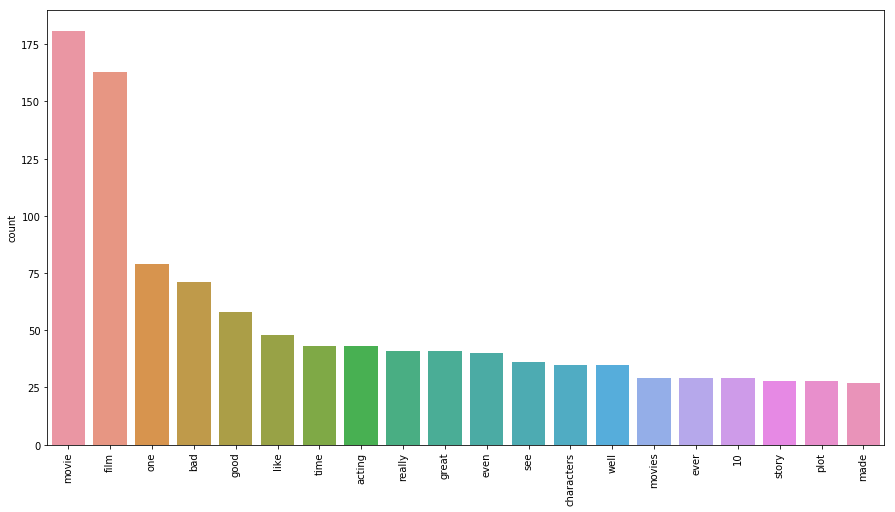

In [22]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X)

### Visualisation du corpus

In [23]:
most_frequent_words_sw['data_counts']

<747x2913 sparse matrix of type '<class 'numpy.int64'>'
	with 6876 stored elements in Compressed Sparse Row format>

In [24]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]

In [25]:
hist[np.argsort(df['label']),:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

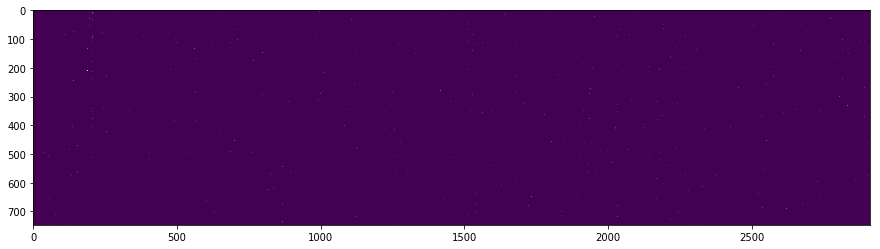

In [26]:
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(df['label']),:])
#plt.colorbar()

### Avec TF_IDF

In [27]:
transformer = TfidfTransformer(smooth_idf=False)
transformer


TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [28]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])


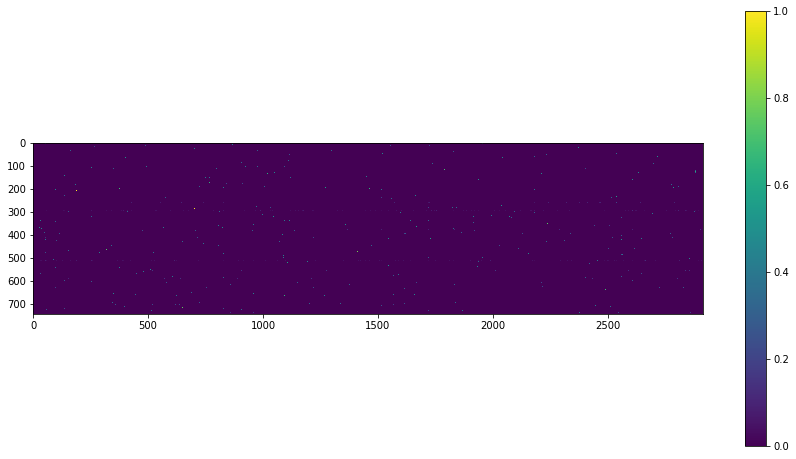

In [29]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(df['label']),:])
plt.colorbar()

## Apprentissage supervisé

### Sur les counts

In [30]:
NB_counts = MultinomialNB()
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=df['label'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),df['label'])

0.9665327978580991

### Sur le TF-IDF

In [31]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),df['label'])

0.9665327978580991

In [32]:
df['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])

In [33]:
df['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())

In [34]:
df[df['prediction_tfidf'] != df['label']]

sentence  label  \
23                             Give this one a look.        1   
38           I don't think you will be disappointed.        1   
58                 A great film by a great director.        1   
63                                             10/10        1   
163  Everything from acting to cinematography was s...      1   
250  I won't say any more - I don't like spoilers, ...      1   
293                 But this movie really got to me.        1   
294                                          See it.        1   
312                                The cast is good.        1   
332                              the cast was great.        1   
414                                     Go watch it!        1   
433                I'll give this film 10 out of 10!        1   
455              There still are good actors around!        1   
478                                   GO AND SEE IT!        1   
484                 A good film by a great director!        1   
487                      This is just a great movie.        1   
496                            Highly recommended A+        1   
541         I just saw this film and I recommend it.        1   
589                                            10/10        1   
595                Predictable, but not a bad watch.        1   
632                       See both films if you can.        1   
690                                      Go rent it.        1   
706                I have recommended it to friends.        1   
728                I keep watching it over and over.        1   
730  If you have not seen this movie, I definitely ...      1   

     prediction_counts  prediction_tfidf  
23                   1                 0  
38                   0                 0  
58                   1                 0  
63                   1                 0  
163                  1                 0  
250                  1                 0  
293                  1                 0  
294                  1                 0  
312                  1                 0  
332                  1                 0  
414                  1                 0  
433                  1                 0  
455                  1                 0  
478                  1                 0  
484                  1                 0  
487                  1                 0  
496                  1                 0  
541                  1                 0  
589                  1                 0  
595                  0                 0  
632                  1                 0  
690                  1                 0  
706                  1                 0  
728                  0                 0  
730                  1                 0

In [35]:
df[df['prediction_counts'] != df['label']]

sentence  label  \
20   If there was ever a movie that needed word-of-...      1   
38           I don't think you will be disappointed.        1   
49   The directing and the cinematography aren't qu...      0   
76   I saw "Mirrormask" last night and it was an un...      0   
123                            Highly unrecommended.        0   
131                   There were too many close ups.        0   
142                   It even has its sweet moments.        1   
175  If you see it, you should probably just leave ...      0   
235  1/10 - and only because there is no setting fo...      0   
244  The last 15 minutes of movie are also not bad ...      1   
335   but the movie makes a lot of serious mistakes.        0   
373                                 Not recommended.        0   
386                                 Not recommended.        0   
468                                  It is not good.        0   
471                        This is a stunning movie.        1   
518           You can find better movies at youtube.        0   
576                     You won't forget this movie!        1   
577                          Why was this film made?        0   
579  The result is a film that just don't look righ...      0   
595                Predictable, but not a bad watch.        1   
624  I struggle to find anything bad to say about i...      1   
651  I'm so sorry but I really can't recommend it t...      0   
658                        This is not movie-making.        0   
672                               Not easy to watch.        0   
728                I keep watching it over and over.        1   

     prediction_counts  prediction_tfidf  
20                   0                 1  
38                   0                 0  
49                   1                 0  
76                   1                 0  
123                  1                 0  
131                  1                 0  
142                  0                 1  
175                  1                 0  
235                  1                 0  
244                  0                 1  
335                  1                 0  
373                  1                 0  
386                  1                 0  
468                  1                 0  
471                  0                 1  
518                  1                 0  
576                  0                 1  
577                  1                 0  
579                  1                 0  
595                  0                 0  
624                  0                 1  
651                  1                 0  
658                  1                 0  
672                  1                 0  
728                  0                 0

In [36]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),df['label'])

0.9866131191432396

In [37]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  wonderful


In [38]:
most_frequent_words_sw['dictionary']

['10',
 '12',
 '13',
 '15',
 '15pm',
 '17',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2005',
 '2006',
 '20th',
 '25',
 '30',
 '40',
 '50',
 '54',
 '70',
 '70000',
 '70s',
 '80',
 '80s',
 '8pm',
 '90',
 '95',
 'aailiyah',
 'abandoned',
 'ability',
 'abroad',
 'absolutely',
 'abstruse',
 'abysmal',
 'academy',
 'accents',
 'accessible',
 'acclaimed',
 'accolades',
 'accurate',
 'accurately',
 'accused',
 'achievement',
 'achille',
 'ackerman',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actually',
 'adams',
 'adaptation',
 'add',
 'added',
 'addition',
 'admins',
 'admiration',
 'admitted',
 'adorable',
 'adrift',
 'adventure',
 'advise',
 'aerial',
 'aesthetically',
 'affected',
 'affleck',
 'afraid',
 'africa',
 'afternoon',
 'age',
 'aged',
 'ages',
 'ago',
 'agree',
 'agreed',
 'air',
 'aired',
 'akasha',
 'akin',
 'alert',
 'alexander',
 'alike',
 'allison',
 'a

### Avec une pipeline

In [39]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])

In [40]:
text_clf.fit(X,df['label'])#
accuracy_score(text_clf.predict(X),df['label'])

0.9825970548862115

## Jeu de données complet

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [41]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

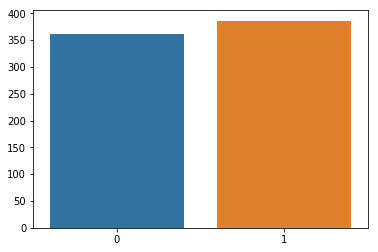

In [42]:
np.unique(y_train)
sns.barplot(np.unique(y_train),df.groupby('label').count().values[:,0])

### Les textes ont été hashés

In [43]:
X_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

### On essaie de reconstruire le 6-ième texte

In [131]:
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset


word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

dico = {value-3:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[0] ))

NameError: name 'id_to_word' is not defined

In [45]:
dico = {}
for word, index in imdb.get_word_index().items():
    dico[index] = word
# for i in range(1, 11):
#    print(i, dico[i])

In [61]:
import string
from nltk.stem import PorterStemmer
def sanitizeee(word):
    return PorterStemmer().stem(''.join(i for i in dico[word] if i not in string.punctuation).lower())

from textblob import Word
def sanitize(word):
    return Word(''.join(i for i in dico[word] if i not in string.punctuation).lower()).lemmatize()

from nltk.stem import WordNetLemmatizer
def sanitize(word):
    base = ''.join(i for i in (dico[word] if isinstance(word, int) else word) if i not in string.punctuation).lower()
    words = list((WordNetLemmatizer().lemmatize(base, mode) for mode in ('a', 's', 'r', 'n', 'v')))
    # If verb detected, it's a verb
    if words[-1] != base:
        return words[-1]
    if len(set(words)) > 1:
        return min((i for i in words if i != base), key=len)
    return min(words, key=len)

In [62]:
sanitize('h\'as')

'have'

In [48]:
dictionnaire = dict((i, sanitize(i)) for i in dico)

In [49]:
print(len(set(dictionnaire.values())))
print(len(set(dico.values())))

62592
88584


In [50]:
import random
for i in range(1, 21):
    word = random.randint(1, len(dico))
    print('%s\t%s\t\t%s' % (word, dico[word], sanitize(word)))

64841	kindling		kindle
79151	daviau		daviau
38715	sweetie		sweetie
21757	interface		interface
28077	stefano		stefano
48396	relocates		relocate
5375	encourage		encourage
26837	wacked		wacked
36660	ymca		ymca
62105	fishing'		fish
82917	busness		busness
4860	muslim		muslim
244	rather		rather
71169	juncos		junco
19787	sitter		sitter
57253	sugared		sugar
14566	flirts		flirt
20103	monogram		monogram
32080	bozos		bozo
23383	reeves'		reeve


In [51]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)


In [52]:
for word_num in X_train[5]:
    # getKeysByValue(imdb.get_word_index(), word_num)
    pass # print(dico[word_num])

In [53]:
X_train.shape
"""for line in range(X_train.shape[0]):
    X_train[line] = [i for i in X_train[line] if dico.get(i) not in stop]

for line in X_train:
    for item in line:
        assert dico.get(item) not in stop, dico.get(item)
"""


'for line in range(X_train.shape[0]):\n    X_train[line] = [i for i in X_train[line] if dico.get(i) not in stop]\n\nfor line in X_train:\n    for item in line:\n        assert dico.get(item) not in stop, dico.get(item)\n'

In [54]:
def frequence_():
    count = {}
    for line in X_train:
        for i in line:
            j = dictionnaire.get(i)
            count.setdefault(j, 0)
            count[j] += 1
    return count

def frequence(index):
    count = 0
    for line in X_train:
        count += line.count(index)
    return count

plus = frequence_()
peu_frequents = set(index for index in dictionnaire if plus.get(dictionnaire[index]) < 2)
# print(plus)
def affiche_derniers(n):
    for i in range(len(dictionnaire), max(1, len(dictionnaire) - n - 1), -1):
        print('%s: %r' % (i, dictionnaire[i]), frequence(i))
def affiche_premiers(n):
    for i in range(1, min(n + 1, len(dictionnaire))):
        print('%s: %s' % (i, dictionnaire[i]), frequence(i))
# affiche_derniers(20)

In [132]:
sanitized_stop = set(sanitize(i) for i in stop)
print(sanitized_stop)
def transforme(X):
    """Transforme une matrice d'indices en une liste de chaînes de caractères.
    Utile pour pouvoir les vectoriser"""
    return [' '.join(dictionnaire.get(i, '') for i in ligne if i > 20 and i not in peu_frequents and dictionnaire.get(i, '') not in sanitized_stop) for ligne in X]

def transforme(X):
    """Transforme une matrice d'indices en une liste de chaînes de caractères.
    Utile pour pouvoir les vectoriser (uniquement les 10000 premiers)"""
    return [' '.join(dictionnaire.get(i, '') for i in ligne if i > 20 and i < 10000 and i not in peu_frequents and dictionnaire.get(i, '') not in sanitized_stop) for ligne in X]

def vectoriser(xTrain, xTest):
    vect = CountVectorizer()
    train = transforme(xTrain)
    test = transforme(xTest)
    # vect.fit(test)
    vect.fit(train)
    return vect.transform(train), vect.transform(test)
        

{'an', 'i', 'him', 'no', 'by', 'his', 'nor', 'hadnt', 'with', 'both', 'o', 'them', 'out', 'our', 'your', 'on', 'when', 'how', 'few', 'too', 'now', 'shant', 'youll', 'what', 'at', 'm', 'youve', 'until', 'they', 'shes', 'mightn', 'while', 'havent', 'mustn', 'himself', 'theirs', 'wasnt', 'you', 'y', 'aren', 'then', 'dont', 'shouldve', 'her', 'into', 'ain', 'where', 'more', 'couldnt', 'whom', 'should', 'll', 'werent', 'here', 'for', 'will', 'wasn', 'above', 'if', 'or', 't', 'do', 'there', 'have', 'arent', 'needn', 'shouldn', 'shouldnt', 'it', 'yourselves', 'hasn', 'that', 'not', 'same', 'against', 'before', 'mightnt', 'far', 'only', 'mustnt', 'he', 'wouldnt', 'couldn', 'why', 'themselves', 'than', 'hasnt', 'can', 'haven', 'weren', 'down', 'but', 'about', 've', 'which', 'a', 'to', 'ma', 'such', 'again', 'don', 'just', 'their', 'd', 'all', 'youd', 'ours', 'ourselves', 'doesn', 'after', 'hadn', 'this', 'youre', 's', 'off', 'between', 'those', 'itself', 'who', 'she', 'thatll', 'isnt', 'myself'

In [133]:
# On transforme X_train et X_test en liste de chaînes de caractères
train=transforme(X_train)
test=transforme(X_test)
#On vectorise X_train et X_test
vect = CountVectorizer()
vect.fit(train)
vect.fit(test)
X_train_mots=vect.transform(train)
X_test_mots=vect.transform(test)

In [142]:
NB_counts = MultinomialNB()
NB_counts.fit(X=X_train_mots,y=y_train)
accuracy_score(NB_counts.predict(X_test_mots),y_test)

0.81452

In [135]:
X_train_mots.shape

(25000, 7143)

In [139]:
length = 5000
tf_idf_transf = transformer.fit_transform(X_train_mots) # 
tf_idf_transftest = transformer.fit_transform(X_test_mots)

In [140]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=y_train) # 
accuracy_score(NB_tfidf.predict(tf_idf_transftest.toarray()),y_test) # .toarray()

0.71468

In [141]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(), y=y_train)
accuracy_score(NB_logistic.predict(tf_idf_transftest.toarray()), y_test)

0.8318

In [155]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])
text_clf.fit(transforme(X_train), y_train)#
accuracy_score(text_clf.predict(transforme(X_test)), y_test)

0.83304

In [147]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
logi = LogisticRegression()
logi.fit(X_train_mots, y_train)
y_preds = logi.predict(X_test_mots)
accuracy_score(y_preds, y_test)

0.81996

In [148]:
logi.predict(vect.transform(transforme([[54505], [25731, 6176, 5715, 72883, 14819, 2314]])))

array([1, 0], dtype=int64)

Taille du dictionnaire :  7170


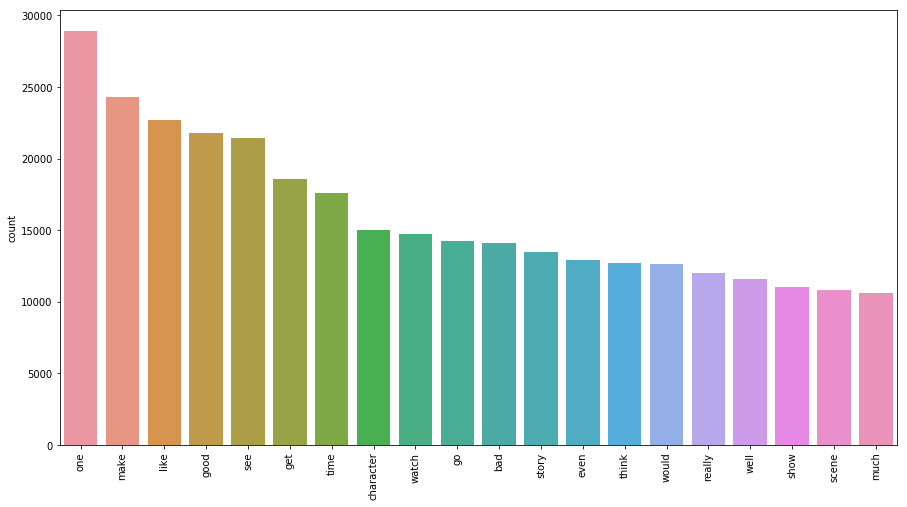

In [144]:
count_vect, x = CountVectorizer(), transforme(X_train)
X_sub_counts = count_vect.fit_transform(x)
most_frequent_words_sub = most_frequent_words(count_vect, x)

In [156]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sub['dictionary'][np.argsort(text_clf.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sub['dictionary'][np.argsort(text_clf.coef_)[0][-1]])

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [110]:
def test(*phrases):
    phrases = [[imdb.get_word_index()[name] for name in sentense.split()] for sentense in phrases]
    print(phrases, [[dictionnaire[i] for i in x] for x in phrases])
    print(transforme(phrases))
    print(vect.transform(transforme(phrases)))
    return NB_counts.predict(vect.transform(transforme(phrases)))
test('wilkes wilkes wilkes wilkes', 'good good')


[[29663, 29663, 29663, 29663], [49, 49]] [['wilkes', 'wilkes', 'wilkes', 'wilkes'], ['good', 'good']]
['wilkes wilkes wilkes wilkes', 'good good']
  (0, 29059)	4
  (1, 11136)	2


array([1, 0], dtype=int64)

In [130]:
review = transforme([X_test[2]])
print(review)
review_transformed = vect.transform(review)
NB_counts.predict(review_transformed)

['plot near ear recent halliburton cosmopolitan flick frank excellent sans past loyalty near really grief family four victim obvious family brave get say cosmopolitan comment orks entertain lamarr jam see vittorio castle portray dirty washington ursula minute station torment promise aragorn horn noir contract speed scream dirty full pacino dignity need men pitchfork popular really way behaviour sturdy standard certainly near beach make imbecilic fail ritt finish wear psycho cosmopolitan learn twice know ring epps seem fail visually posthumous extremely scoop ishtar like child easily thug simply must well although family many scene time seem de ignore boat morning like well force suggestion send history like story disappoint club finch watch husband reviewer although around finch except de impersonation available hour animal show optimism dead white splatter wait tenant attention documentary 3 eduardo accent committee ann come 9 place overseas scoop spradlin know mode bonus central one 

array([1], dtype=int64)